In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
churn_data=pd.read_csv(r'customer_churn.csv')

In [27]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn_data.shape

(7043, 21)

In [6]:
churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
churn_data.isna().sum()  ##to check null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
churn_data['TotalCharges']=churn_data['TotalCharges'].astype(float)

ValueError: could not convert string to float: ''

In [14]:
churn_data['TotalCharges']=pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

In [15]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
churn_data.isna().sum()  ##to check null values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
churn_data.dropna(inplace=True) ##removing the na values

In [17]:
churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
churn_data.shape

(7032, 21)

In [24]:
churn_data.customerID.nunique()

7032

In [25]:
churn_data.gender.nunique()

2

In [19]:
churn_data.drop(columns=['customerID'],inplace=True)

In [20]:
churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
churn_data['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [ ]:
##converting all the categorical data into numeric

In [22]:
churn_data['gender'] = churn_data['gender'].map({'Male': 1, 'Female': 0})
churn_data['Partner'] = churn_data['Partner'].map({'Yes': 1, 'No': 0})
churn_data['Dependents'] = churn_data['Dependents'].map({'Yes': 1, 'No': 0})
churn_data['PhoneService']= churn_data['PhoneService'].map({'Yes': 1,'No': 0})
churn_data['MultipleLines']=churn_data['MultipleLines'].map({'No phone service':0, 'No': 1, "Yes": 2})
churn_data['InternetService']=churn_data['InternetService'].map({'DSL':0, 'Fiber optic':1, 'No':2})
churn_data['OnlineSecurity']=churn_data['OnlineSecurity'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['OnlineBackup']=churn_data['OnlineBackup'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['DeviceProtection']=churn_data['DeviceProtection'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['TechSupport']=churn_data['TechSupport'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['StreamingTV']=churn_data['StreamingTV'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['StreamingMovies']=churn_data['StreamingMovies'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['Contract']=churn_data['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
churn_data['PaperlessBilling']=churn_data['PaperlessBilling'].map({'Yes':1, 'No':0})
churn_data['PaymentMethod']=churn_data['PaymentMethod'].map({'Electronic check':1, 'Mailed check':0, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})

In [23]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,29.85,29.85,No
1,1,0,0,0,34,1,1,0,1,0,1,0,0,0,1,0,0,56.95,1889.50,No
2,1,0,0,0,2,1,1,0,1,1,0,0,0,0,0,1,0,53.85,108.15,Yes
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,No
4,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,1,1,70.70,151.65,Yes


In [24]:
churn_data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [32]:
churn_data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
churn_data['Churn'] = churn_data['Churn'].map({'Yes': 1, 'No': 0})

In [26]:
churn_data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [27]:
### Mapping target and features
x=churn_data.iloc[:,:-1].values
y=churn_data.iloc[:,-1].values

In [28]:
x.shape

(7032, 19)

In [29]:
y.shape

(7032,)

In [30]:
### splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)  ### random_state means that each time it takes the same row

In [31]:
rf_data=RandomForestClassifier(n_estimators=500)   ### n_estimators means how many trees are going to be taken. Default value of estimator is 100

In [32]:
### training the model
rf_data.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [35]:
### Model creation
y_pred=rf_data.predict(x_test)

In [36]:
y_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [37]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [54]:
y_pred.shape

(1407,)

In [55]:
y_test.shape

(1407,)

In [38]:
c1=confusion_matrix(y_test,y_pred)

In [39]:
print(c1)   ## TP=929 FP=109 FN=188 TN=181

[[932 106]
 [185 184]]


In [40]:
a1=accuracy_score(y_test,y_pred)

In [41]:
print(a1)

0.7931769722814499


In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1117
           1       0.50      0.63      0.56       290

    accuracy                           0.79      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.82      0.79      0.80      1407



In [44]:
### Sensitivity or Recall calculation
sen1=c1[0,0]/(c1[0,0]+c1[1,0])
sen1

0.8343777976723367

In [45]:
### Specificity calculation
spec1=c1[1,1]/(c1[1,1]+c1[0,1])
spec1

0.6344827586206897

In [ ]:
#Sensitivity: the ability of a test to correctly identify the churned out customers. 
#sen=TP/TP+FN
#Specificity: the ability of a test to correctly identify people who have not churned out.
#sep: =TN/TN+FP

In [46]:
from sklearn.datasets import make_classification
importance = rf_data.feature_importances_

In [47]:
importance

array([0.02775898, 0.02177302, 0.02186902, 0.01921645, 0.15937761,
       0.0044924 , 0.02385036, 0.02445758, 0.03881577, 0.02848495,
       0.02205011, 0.03908577, 0.01972678, 0.0210467 , 0.08446551,
       0.02536897, 0.05197875, 0.17715386, 0.18902742])

In [75]:
importance= pd.Series(importance) ### importance of each columns
importance

0     0.027313
1     0.021405
2     0.022094
3     0.019437
4     0.161427
5     0.004450
6     0.024223
7     0.024878
8     0.038942
9     0.028336
10    0.024788
11    0.040876
12    0.019462
13    0.020880
14    0.077229
15    0.025249
16    0.051980
17    0.176653
18    0.190379
dtype: float64

In [48]:
df=pd.DataFrame(columns=['Feature','Importance'])

In [49]:
df

,Feature,Importance


In [50]:
col_list = list(churn_data.columns)

In [51]:
col_list

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [52]:
col_list.pop(-1)

'Churn'

In [53]:
col_list

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [54]:
df['Feature']=col_list

In [55]:
df

,Feature,Importance
0,gender,NaN
1,SeniorCitizen,NaN
2,Partner,NaN
3,Dependents,NaN
4,tenure,NaN
5,PhoneService,NaN
6,MultipleLines,NaN
7,InternetService,NaN
8,OnlineSecurity,NaN
9,OnlineBackup,NaN


In [56]:
df['Importance']=importance

In [57]:
df

,Feature,Importance
0,gender,0.027759
1,SeniorCitizen,0.021773
2,Partner,0.021869
3,Dependents,0.019216
4,tenure,0.159378
5,PhoneService,0.004492
6,MultipleLines,0.023850
7,InternetService,0.024458
8,OnlineSecurity,0.038816
9,OnlineBackup,0.028485


In [58]:
df.sort_values(by='Importance', ascending=False)

,Feature,Importance
18,TotalCharges,0.189027
17,MonthlyCharges,0.177154
4,tenure,0.159378
14,Contract,0.084466
16,PaymentMethod,0.051979
11,TechSupport,0.039086
8,OnlineSecurity,0.038816
9,OnlineBackup,0.028485
0,gender,0.027759
15,PaperlessBilling,0.025369


<AxesSubplot:xlabel='Feature', ylabel='Importance'>

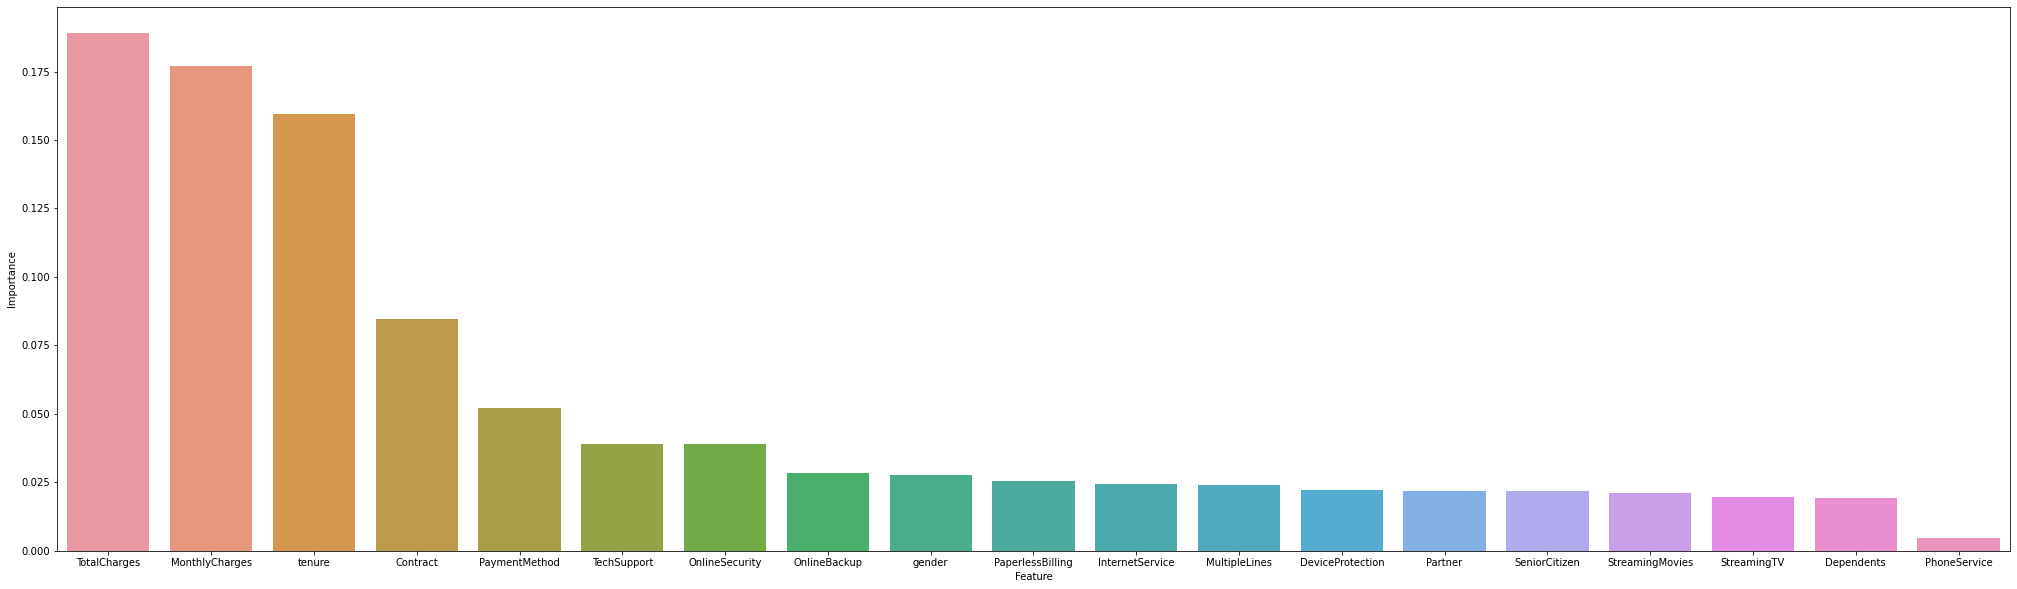

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(35,10))
# make barplot and sort bars
sns.barplot(x='Feature',y="Importance",data=df, order=df.sort_values('Importance', ascending=False).Feature)